### **Otimização de Rotas para Entregas de Garrafões de Água com Restrição de Capacidade**

O problema a ser abordado consiste na otimização das rotas de entrega de garrafões de água para uma distribuidora, que atende a uma lista de pedidos agendados em diferentes residências dentro de uma cidade.

**O desafio principal reside no fato de que os veículos de entrega possuem uma capacidade limitada de 6 garrafões de água por veículo**, o que impossibilita que um único veículo atenda a todos os pedidos, exigindo a utilização de múltiplos veículos e a criação de múltiplas rotas. Este cenário se enquadra no **Problema de Roteamento de Veículos com Restrição de Capacidade (VRP-CC)**, uma classe complexa de problemas de otimização combinatória.

O objetivo é determinar a melhor sequência de visitas para cada veículo, garantindo que a capacidade de 6 garrafões não seja excedida por rota, e que todos os clientes sejam atendidos, minimizando a distância total percorrida por toda a frota de veículos. Dada a natureza NP-hard do VRP-CC, métodos heurísticos e meta-heurísticos, como os Algoritmos Genéticos, são ideais para encontrar soluções de alta qualidade em um tempo computacional razoável.

### Gerando o Dataset

Definições:
* Coordenadas da distribuidora: (-3.1071,-60.0261)
* Número máximo de clientes por rota: 6
* Cada cliente pode pedir apenas 1 garrafão

In [ ]:
import numpy as np

#Coordenadas da Distribuidora
dist_coords = {'id': 0, 'lat': -3.1071, 'lon': -60.0261, 'tipo': 'dist'}

#Máximo de itens por pedido
capacidade_veiculo = 6

#Geração das Coordenadas dos Clientes
num_clientes = 15

# Definir a faixa de latitude e longitude para a geração aleatória
# Área dentro da cidade de Manaus
min_lat = -3.15
max_lat = -3.05
min_lon = -60.05
max_lon = -59.95

# Gerar latitudes e longitudes aleatórias para todos os clientes
clientes_latitudes = np.random.uniform(min_lat, max_lat, size=num_clientes)
clientes_longitudes = np.random.uniform(min_lon, max_lon, size=num_clientes)

clientes_data = []
for i in range(num_clientes):
    clientes_data.append({
        'id': i + 1, # O ID do cliente, começando de 1
        'lat': clientes_latitudes[i],
        'lon': clientes_longitudes[i],
        'demanda': 1
    })

print("--- Coordenadas dos Clientes ---")
for cliente in clientes_data:
    print(f"ID: {cliente['id']}, Lat: {cliente['lat']:.6f}, Lon: {cliente['lon']:.6f}, Demanda: {cliente['demanda']}")

--- Coordenadas dos Clientes ---
ID: 1, Lat: -3.104980, Lon: -59.955800, Demanda: 1
ID: 2, Lat: -3.127242, Lon: -60.015883, Demanda: 1
ID: 3, Lat: -3.120251, Lon: -59.993381, Demanda: 1
ID: 4, Lat: -3.139913, Lon: -60.049741, Demanda: 1
ID: 5, Lat: -3.092121, Lon: -60.010655, Demanda: 1
ID: 6, Lat: -3.132812, Lon: -60.005030, Demanda: 1
ID: 7, Lat: -3.061523, Lon: -60.015657, Demanda: 1
ID: 8, Lat: -3.059732, Lon: -60.033043, Demanda: 1
ID: 9, Lat: -3.052360, Lon: -60.021853, Demanda: 1
ID: 10, Lat: -3.085079, Lon: -60.007831, Demanda: 1
ID: 11, Lat: -3.115810, Lon: -60.046016, Demanda: 1
ID: 12, Lat: -3.143567, Lon: -59.960369, Demanda: 1
ID: 13, Lat: -3.056902, Lon: -60.047532, Demanda: 1
ID: 14, Lat: -3.057033, Lon: -60.018990, Demanda: 1
ID: 15, Lat: -3.082256, Lon: -60.040420, Demanda: 1


### Calculando a matriz de distâncias
O Algoritmo Genético precisa das distâncias entre todos os pontos para calcular a aptidão das rotas. Então, aplicamos o cálculo da Distância Haversine, visto que esse método calcula a distância da superfície de uma esfera (Planeta Terra), sendo considerado o mais adequado para coordenadas geográficas.

In [ ]:
#Função para Calcular Distância de Haversine
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371 # Raio da Terra em quilômetros

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

#Construir a lista de todos os pontos (distribuidora + clientes)
todos_coords = [dist_coords] + clientes_data

#Gerar a Matriz de Distâncias
num_total_coords = len(todos_coords)
dist_matrix_np = np.zeros((num_total_coords, num_total_coords)) # Inicializa uma matriz de zeros

for i in range(num_total_coords):
    for j in range(num_total_coords):
        if i == j:
            dist_matrix_np[i, j] = 0.0
        else:
            p1 = todos_coords[i]
            p2 = todos_coords[j]
            dist = haversine_distance(p1['lat'], p1['lon'], p2['lat'], p2['lon'])
            dist_matrix_np[i, j] = dist

print("\n--- Matriz de Distâncias (km) ---")
print(np.array2string(dist_matrix_np, precision=2, separator=', '))


--- Matriz de Distâncias (km) ---
[[ 0.  ,  7.81,  2.51,  3.92,  4.49,  2.39,  3.69,  5.2 ,  5.32,  6.11,
   3.18,  2.41,  8.35,  6.07,  5.62,  3.19],
 [ 7.81,  0.  ,  7.12,  4.5 , 11.13,  6.26,  6.28,  8.22,  9.94,  9.38,
   6.19, 10.09,  4.32, 11.5 ,  8.81,  9.73],
 [ 2.51,  7.12,  0.  ,  2.62,  4.01,  3.95,  1.35,  7.31,  7.74,  8.35,
   4.77,  3.58,  6.43,  8.57,  7.81,  5.7 ],
 [ 3.92,  4.5 ,  2.62,  0.  ,  6.63,  3.67,  1.9 ,  6.98,  8.04,  8.18,
   4.23,  5.86,  4.49,  9.26,  7.58,  6.72],
 [ 4.49, 11.13,  4.01,  6.63,  0.  ,  6.86,  5.03,  9.5 ,  9.11, 10.22,
   7.67,  2.71,  9.93,  9.23,  9.83,  6.49],
 [ 2.39,  6.26,  3.95,  3.67,  6.86,  0.  ,  4.57,  3.45,  4.38,  4.59,
   0.84,  4.73,  7.99,  5.67,  4.01,  3.48],
 [ 3.69,  6.28,  1.35,  1.9 ,  5.03,  4.57,  0.  ,  8.01,  8.7 ,  9.14,
   5.32,  4.93,  5.1 ,  9.67,  8.57,  6.86],
 [ 5.2 ,  8.22,  7.31,  6.98,  9.5 ,  3.45,  8.01,  0.  ,  1.94,  1.23,
   2.76,  6.91, 11.  ,  3.58,  0.62,  3.59],
 [ 5.32,  9.94,  7.74,  8.04,

### Implementação do Algoritmo Genético
Definições:
* Indivíduo: Representação de uma rota. Será uma permutação dos IDs dos clientes, por exemplo: [0, 1, 5, 2, 3, 6, 4, 0]. A distribuidora é representada pelo ID = 0.
* População: Uma lista de objetos Indivíduo.
* Capacidade de cada veículo: 6 itens

In [ ]:
dist_id = 0

class Individuo:
    def __init__(self, cromossomo):
        self.cromossomo = cromossomo
        self.aptidao = 0.0
        self.distancia_total = 0.0
        self.violacao_capacidade = False

    def __repr__(self):
        return f"Cromossomo: {self.cromossomo}, Aptidao: {self.aptidao:.4f}, Dist: {self.distancia_total:.2f}, Violacao: {self.violacao_capacidade}"


Funções auxiliares do algoritmo:

In [ ]:
import numpy as np
import random
import copy

def decodificar_cromossomo(cromossomo):
    rotas = []
    rota_atual = [dist_id]
    for gene in cromossomo:
        if gene == dist_id: #encontrou o fim de uma rota
            if len(rota_atual) > 1:
                rota_atual.append(dist_id) #termina a rota no depósito
                rotas.append(rota_atual)
            rota_atual = [dist_id] #começa nova rota no depósito
        else:
            rota_atual.append(gene)

    #"fecha" a última rota voltando para distribuidora (id = 0)
    if len(rota_atual) > 1 and rota_atual[-1] != 0:
        rota_atual.append(dist_id)
        rotas.append(rota_atual)

    return rotas


def calcular_aptidao(individuo, fator_penalidade=1000):
    rotas = decodificar_cromossomo(individuo.cromossomo)
    distancia_total_frota = 0.0
    total_violacao_capacidade = 0

    for rota in rotas:
        distancia_rota = 0.0
        carga_rota = 0

        #calcula distância e carga da rota
        for i in range(len(rota) - 1):
            ponto_origem_id = rota[i]
            ponto_destino_id = rota[i+1]
            distancia_rota += dist_matrix_np[ponto_origem_id][ponto_destino_id]

            if rota[i+1] != todos_coords[0]['id']:
                cliente_id_no_todos_pontos = rota[i+1]
                carga_rota += todos_coords[cliente_id_no_todos_pontos]['demanda']

        distancia_total_frota += distancia_rota

        #verifica se passou da capacidade maxima do veiculo
        if carga_rota > capacidade_veiculo:
            total_violacao_capacidade += (carga_rota - capacidade_veiculo)
            individuo.violacao_capacidade = True

    #mecanismo de penalidade: custo aumentado
    #quanto maior for o custo, menor é a aptidão
    penalidade = total_violacao_capacidade * fator_penalidade
    custo_total = distancia_total_frota + penalidade
    if custo_total == 0:
        individuo.aptidao = 0.0
    else:
        individuo.aptidao = 1 / custo_total

    individuo.distancia_total = distancia_total_frota
    return individuo.aptidao

def gerar_populacao_inicial(tamanho_populacao, clientes_ids):
    populacao = []
    num_clientes = len(clientes_ids)
    min_veiculos = int(np.ceil(num_clientes / capacidade_veiculo))

    for _ in range(tamanho_populacao):
        cromossomo_clientes = list(clientes_ids)
        random.shuffle(cromossomo_clientes)

        cromossomo_final = []
        clientes_alocados = 0
        for cliente_id in cromossomo_clientes:
            cromossomo_final.append(cliente_id)
            clientes_alocados += 1

            #insere a distribuidora na rota
            if clientes_alocados % capacidade_veiculo == 0 and clientes_alocados < num_clientes:
                cromossomo_final.append(dist_id)

        #reinicia rotas aleatoriamente se a quantidade de rotas for menor que a mínima esperada
        current_separators = cromossomo_final.count(dist_id)
        if current_separators < min_veiculos - 1:
             num_separators_to_add = (min_veiculos - 1) - current_separators
             for _ in range(num_separators_to_add):
                 insert_pos = random.randint(0, len(cromossomo_final))
                 cromossomo_final.insert(insert_pos, dist_id)

        if cromossomo_final and cromossomo_final[0] == dist_id:
            cromossomo_final.pop(0)
        if cromossomo_final and cromossomo_final[-1] == dist_id:
            cromossomo_final.pop(-1)

        if not cromossomo_final:
            populacao.append(Individuo([]))
            continue

        populacao.append(Individuo(cromossomo_final))
    return populacao

def selecao_torneio(populacao, tamanho_torneio=3):
    competidores = random.sample(populacao, min(tamanho_torneio, len(populacao)))
    return max(competidores, key=lambda ind: ind.aptidao)

def crossover_pmx(parent1_cromossomo, parent2_cromossomo, depot_id=0):
    clientes_p1 = [gene for gene in parent1_cromossomo if gene != depot_id]
    clientes_p2 = [gene for gene in parent2_cromossomo if gene != depot_id]

    if not clientes_p1 or not clientes_p2:
        return random.choice([parent1_cromossomo, parent2_cromossomo])

    #define os pontos de corte
    size = len(clientes_p1)
    cut1, cut2 = sorted(random.sample(range(size), 2))

    #inicializa o cromossomo filho
    child_clientes = [None] * size

    #copia uma parte do pai 1 pro filho
    child_clientes[cut1:cut2] = clientes_p1[cut1:cut2]

    #mapeamento para garantir que os genes sao unicos
    mapping = {}
    for i in range(cut1, cut2):
        mapping[clientes_p1[i]] = clientes_p2[i]

    #preencher o restante do filho
    for i in range(size):
        if child_clientes[i] is None:
            gene = clientes_p2[i]
            while gene in child_clientes[cut1:cut2]:
                gene = mapping.get(gene, gene)

            if gene in child_clientes[cut1:cut2]:
                available_genes = [g for g in clientes_p2 if g not in child_clientes[cut1:cut2]]
                if available_genes:
                    gene = random.choice(available_genes)
                else:
                    gene = random.choice([g for g in clientes_p1 if g not in child_clientes[cut1:cut2] and g not in child_clientes[:i]])

            child_clientes[i] = gene

    #adiciona separadores aleatoriamente
    num_separadores = max(parent1_cromossomo.count(depot_id), parent2_cromossomo.count(depot_id))
    final_child_cromossomo = list(child_clientes)
    for _ in range(num_separadores):
        if len(final_child_cromossomo) > 1:
            insert_pos = random.randint(1, len(final_child_cromossomo) - 1)
            final_child_cromossomo.insert(insert_pos, depot_id)
        elif len(final_child_cromossomo) == 0:
            return [depot_id, depot_id]

    temp_cromossomo = []
    if final_child_cromossomo and final_child_cromossomo[0] == depot_id:
        final_child_cromossomo.pop(0)

    for gene in final_child_cromossomo:
        if gene == depot_id and temp_cromossomo and temp_cromossomo[-1] == depot_id:
            continue
        temp_cromossomo.append(gene)

    if temp_cromossomo and temp_cromossomo[-1] == depot_id:
        temp_cromossomo.pop(-1)

    return temp_cromossomo if temp_cromossomo else [depot_id]


def mutacao_swap_inter_rota(cromossomo, depot_id=0):
    cromossomo_mutado = copy.deepcopy(cromossomo)
    cliente_indices = [i for i, gene in enumerate(cromossomo_mutado) if gene != depot_id]
    if len(cliente_indices) < 2:
        return cromossomo_mutado

    idx1, idx2 = random.sample(cliente_indices, 2)
    cromossomo_mutado[idx1], cromossomo_mutado[idx2] = cromossomo_mutado[idx2], cromossomo_mutado[idx1]

    return cromossomo_mutado

Implementação do VRP

In [ ]:
def algoritmo_genetico_vrp(clientes_ids_list,
    tamanho_populacao=100, num_geracoes=500,
    prob_crossover=0.8, prob_mutacao=0.1,
    tamanho_torneio=5, elitismo_count=2
):
    populacao = gerar_populacao_inicial(tamanho_populacao, clientes_ids_list)

    #avalia a população inicial gerada
    for ind in populacao:
        calcular_aptidao(ind)

    melhor_individuo_geral = max(populacao, key=lambda ind: ind.aptidao)
    print(f"Geração 0 - População Inicial - Melhor Aptidão: {melhor_individuo_geral.aptidao:.4f}, Distância: {melhor_individuo_geral.distancia_total:.2f}")

    historico_melhor_aptidao = [melhor_individuo_geral.aptidao]
    historico_melhor_distancia = [melhor_individuo_geral.distancia_total]

    for geracao in range(1, num_geracoes + 1):
        nova_populacao = []

        #elitismo: seleciona os melhores individuos
        populacao.sort(key=lambda ind: ind.aptidao, reverse=True)
        nova_populacao.extend(populacao[:elitismo_count])

        while len(nova_populacao) < tamanho_populacao:
            #selecão por torneio
            pai1 = selecao_torneio(populacao, tamanho_torneio)
            pai2 = selecao_torneio(populacao, tamanho_torneio)

            filho1_cromossomo = None
            filho2_cromossomo = None

            #define se vai ter cruzamento - gera 2 filhos
            if random.random() < prob_crossover:
                filho1_cromossomo = crossover_pmx(pai1.cromossomo, pai2.cromossomo, depot_id=todos_coords[0]['id'])
                filho2_cromossomo = crossover_pmx(pai2.cromossomo, pai1.cromossomo, depot_id=todos_coords[0]['id'])
            else:
                filho1_cromossomo = copy.deepcopy(pai1.cromossomo)
                filho2_cromossomo = copy.deepcopy(pai2.cromossomo)

            #define se vai ter mutação
            if random.random() < prob_mutacao:
                filho1_cromossomo = mutacao_swap_inter_rota(filho1_cromossomo, depot_id=todos_coords[0]['id'])
            if random.random() < prob_mutacao:
                 filho2_cromossomo = mutacao_swap_inter_rota(filho2_cromossomo, depot_id=todos_coords[0]['id'])

            #adiciona os filhos na nova população
            nova_populacao.append(Individuo(filho1_cromossomo))
            if len(nova_populacao) < tamanho_populacao:
                 nova_populacao.append(Individuo(filho2_cromossomo))

        #avalia a nova população
        for ind in nova_populacao:
            calcular_aptidao(ind)

        populacao = nova_populacao

        #define o melhor da nova geração
        melhor_da_geracao = max(populacao, key=lambda ind: ind.aptidao)
        if melhor_da_geracao.aptidao > melhor_individuo_geral.aptidao:
            melhor_individuo_geral = copy.deepcopy(melhor_da_geracao)

        historico_melhor_aptidao.append(melhor_individuo_geral.aptidao)
        historico_melhor_distancia.append(melhor_individuo_geral.distancia_total)

        #print(f"Geração {geracao} - Melhor Aptidão: {melhor_individuo_geral.aptidao:.4f}, Distância: {melhor_individuo_geral.distancia_total:.2f}")

    return melhor_individuo_geral, historico_melhor_aptidao, historico_melhor_distancia

### Resultados

Iniciando Algoritmo Genético para 15 clientes...
Geração 0 - População Inicial - Melhor Aptidão: 0.0121, Distância: 82.43

--- Melhor Solução Encontrada ---
Indivíduo: [15, 13, 3, 1, 12, 6, 0, 5, 10, 7, 14, 9, 8, 0, 2, 4, 11]
Distância Total da Rota: 58.68 km
Aptidão: 0.0170

Rotas Detalhadas:
Rota 1: 0 -> 15 -> 13 -> 3 -> 1 -> 12 -> 6 -> 0 (Carga: 6/6 garrafões)
Rota 2: 0 -> 5 -> 10 -> 7 -> 14 -> 9 -> 8 -> 0 (Carga: 6/6 garrafões)
Rota 3: 0 -> 2 -> 4 -> 11 -> 0 (Carga: 3/6 garrafões)


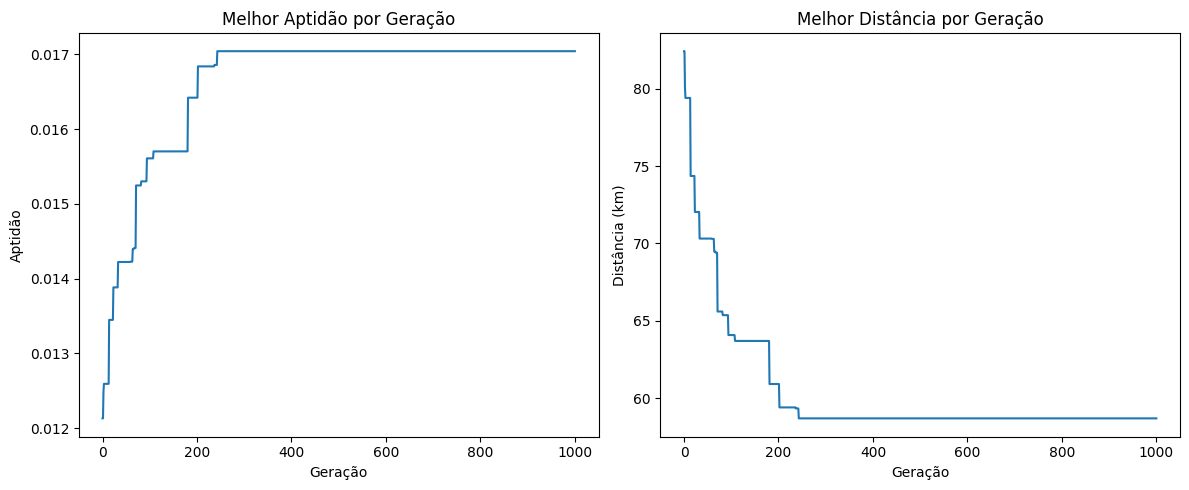

In [ ]:
if __name__ == "__main__":
    clientes_ids_para_ag = [p['id'] for p in todos_coords if p['id'] != 0]

    print(f"Iniciando Algoritmo Genético para {len(clientes_ids_para_ag)} clientes...")

    melhor_solucao, hist_aptidao, hist_distancia = algoritmo_genetico_vrp(
        clientes_ids_list=clientes_ids_para_ag,
        tamanho_populacao=100,
        num_geracoes=1000,
        prob_crossover=0.8,
        prob_mutacao=0.1,
        tamanho_torneio=5,
        elitismo_count=3
    )

    print("\n--- Melhor Solução Encontrada ---")
    print(f"Indivíduo: {melhor_solucao.cromossomo}")
    print(f"Distância Total da Rota: {melhor_solucao.distancia_total:.2f} km")
    print(f"Aptidão: {melhor_solucao.aptidao:.4f}")

    rotas_finais = decodificar_cromossomo(melhor_solucao.cromossomo)
    print("\nRotas Detalhadas:")
    for i, rota in enumerate(rotas_finais):
        rota_str = " -> ".join([str(p_id) for p_id in rota])
        carga_rota = 0
        for j in range(len(rota)):
            if rota[j] != todos_coords[0]['id']:
                carga_rota += todos_coords[rota[j]]['demanda']
        print(f"Rota {i+1}: {rota_str} (Carga: {carga_rota}/{capacidade_veiculo} garrafões)")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist_aptidao)
    plt.title('Melhor Aptidão por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão')
    plt.subplot(1, 2, 2)
    plt.plot(hist_distancia)
    plt.title('Melhor Distância por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Distância (km)')
    plt.tight_layout()
    plt.show()